In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import os

In [78]:
version = 'v1'

In [79]:
# ----------------------------------------------------------------------------
model_name = 'supervised_vae'
outputs_dir = '../../data/outputs/'

bootstrap_dir = '../../outputs/' + model_name + '/bootstrap_ids/'
model_dir = bootstrap_dir + version + '/' 

In [80]:
datasets_path = '../../data/datasets/'
dataset_name = 'test_dataset'
dataset_path = datasets_path + dataset_name + '.csv'

## Load data

In [81]:
#Loading data
test_df = pd.read_csv(dataset_path)
test_df.tail()

,IDX_STUDENT,COD_PROGRAMA,JORNADA,DURACION,PERIODO_INGRESO,SEXO,ESTADO_CIVIL,ESTRATO,RANGO_EDAD,CONDICION_EXCEPCION,...,RANGO_INGRESOS,RANGO_GASTOS,TIPO_VIVIENDA,PUNTAJE_ICFES,PCN,PLC,PMA,PSC,PIN,GRADUADO_A_TIEMPO
343,STUDENT_1648,2710,2,7,7,1,1,2,3,1,...,4,4,2,223,45,48,51,46,33,1
344,STUDENT_1746,2710,2,7,5,1,1,3,2,1,...,2,2,2,277,60,47,60,55,55,1
345,STUDENT_1750,2710,2,7,5,1,1,1,4,1,...,2,2,4,298,57,59,64,69,48,1
346,STUDENT_1773,2710,2,7,5,1,1,3,2,1,...,2,2,2,242,56,46,49,41,50,1
347,STUDENT_1873,2710,1,6,2,1,1,2,3,1,...,2,2,2,236,48,53,60,44,31,1


## Bootstrapping

In [82]:
name_id_label = 'IDX_STUDENT'
name_var_target = 'GRADUADO_A_TIEMPO'
normal_label = 0 #0: not graduate on time
abnormal_label = 1

In [83]:
n_bootstrap = 10

In [84]:
mean_list = []

In [85]:
for i_bootstrap in tqdm(range(n_bootstrap)):
    bootstrap_model_dir = model_dir + '{:03d}'.format(i_bootstrap)
    
    output_dataset_dir = bootstrap_model_dir + '/outputs/'
    
    reconstruction_error_df = pd.read_csv(output_dataset_dir + 'reconstruction_error.csv')
    
    error_normal = reconstruction_error_df.loc[test_df[name_var_target] == normal_label]['Reconstruction error']
    error_abnormal = reconstruction_error_df.loc[test_df[name_var_target] == abnormal_label]['Reconstruction error']
    
    mean_list.append([error_normal.mean(), error_abnormal.mean()])

100%|██████████| 10/10 [00:00<00:00, 142.55it/s]


In [86]:
output_figs_dir = '../../outputs/' + model_name + '/deviations/' + version + '/' 

if not os.path.exists(output_figs_dir):
        os.mkdir(output_figs_dir)

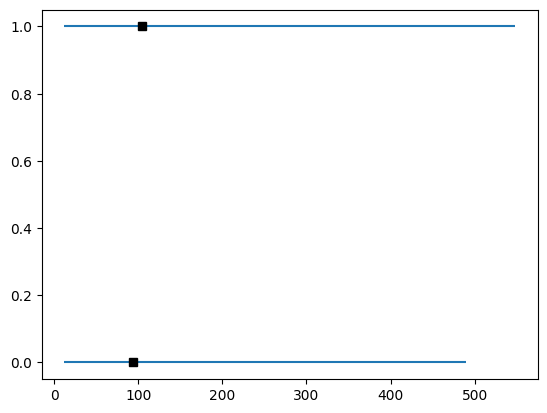

In [87]:
mean_list = np.array(mean_list)
len_mean_list = 2

plt.hlines(range(len_mean_list),
            np.percentile(mean_list, 2.5, axis=0),
            np.percentile(mean_list, 97.5, axis=0))
plt.plot(np.mean(mean_list, axis=0), range(len_mean_list), 's', color='k')
#plt.savefig(output_figs_dir + 'ADNI.png', format='png')
#plt.close()
#plt.clf()

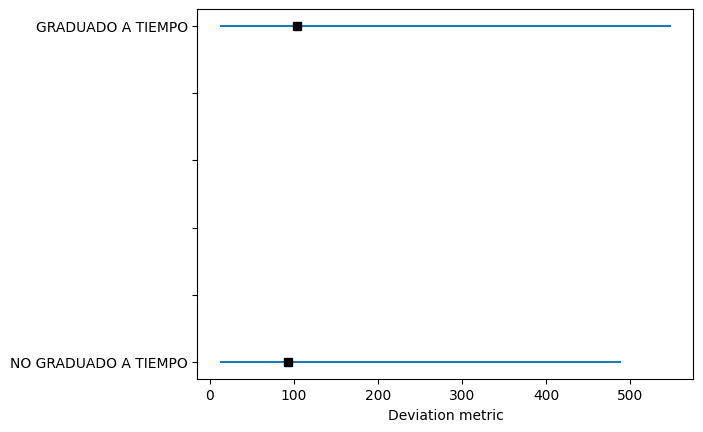

In [88]:
import matplotlib.ticker as ticker

plt.hlines(range(len_mean_list),
            np.percentile(mean_list, 2.5, axis=0),
            np.percentile(mean_list, 97.5, axis=0))

def formatter(y, pos):
    lbl = ''
    if y == 0:
        lbl = 'NO GRADUADO A TIEMPO'
    elif y >= 1:
        lbl =  'GRADUADO A TIEMPO'
        
    return lbl

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.plot(np.mean(mean_list, axis=0), range(len_mean_list), 's', color='k')
plt.xlabel("Deviation metric")
plt.savefig(output_figs_dir + 'deviations.png', format='png')

In [89]:
results = np.array([
    ['Mean', np.mean(mean_list, axis=0)[0], np.mean(mean_list, axis=0)[1]],
    ['Lower', np.percentile(mean_list, 2.5, axis=0)[0],  np.percentile(mean_list, 2.5, axis=0)[1]],
    ['Upper', np.percentile(mean_list, 97.5, axis=0)[0], np.percentile(mean_list, 97.5, axis=0)[1]]
])

results_df = pd.DataFrame(results, columns=['Measure', 'NO GRADUADO A TIEMPO', 'GRADADO A TIEMPO'])

In [90]:
results_df

,Measure,NO GRADUADO A TIEMPO,GRADADO A TIEMPO
0,Mean,93.35265390292135,103.94339578129409
1,Lower,12.382973806755617,12.14404428764706
2,Upper,489.0787843782305,548.0715034838236


In [91]:
results_df.to_csv(output_figs_dir +  'deviations.csv', index=False)